In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Time Analysis

## Data

In [47]:
time_df = pd.read_csv("time_data.csv")

In [48]:
time_df.describe().drop("count")

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Round_Encryption_Time,Modified_AES_Round_Decryption_Time,Modified_AES_Time_Encryption_Time,Modified_AES_Time_Decryption_Time
mean,0.003154,0.003692,0.000949,0.000657,0.001110,0.001313,0.000744,0.000858
std,0.000974,0.001007,0.000386,0.000307,0.000403,0.000584,0.000219,0.000212
min,0.002326,0.002724,0.000651,0.000422,0.000848,0.000977,0.000594,0.000686
25%,0.002588,0.003003,0.000716,0.000477,0.000894,0.001020,0.000607,0.000704
50%,0.002791,0.003349,0.000806,0.000574,0.000984,0.001127,0.000662,0.000780
75%,0.003187,0.004013,0.001034,0.000683,0.001142,0.001305,0.000781,0.000904
max,0.007256,0.008853,0.003263,0.002073,0.003433,0.004653,0.001769,0.001619


In [49]:
time_df.head(10)

,Original_AES_Encryption_Time,Original_AES_Decryption_Time,Josephus_AES_Encryption_Time,Josephus_AES_Decryption_Time,Modified_AES_Round_Encryption_Time,Modified_AES_Round_Decryption_Time,Modified_AES_Time_Encryption_Time,Modified_AES_Time_Decryption_Time
0,0.002647,0.003935,0.000686,0.001929,0.000861,0.001359,0.000658,0.001619
1,0.003043,0.004409,0.001358,0.000618,0.001326,0.001013,0.001043,0.000700
2,0.003082,0.003939,0.000725,0.000666,0.000867,0.001316,0.000598,0.000710
3,0.003507,0.004153,0.001366,0.000833,0.000982,0.001034,0.000607,0.000742
4,0.005742,0.003267,0.001238,0.000474,0.001273,0.000997,0.001068,0.000696
5,0.002627,0.002736,0.000803,0.000427,0.000880,0.001333,0.000602,0.000939
6,0.003109,0.003567,0.000842,0.000589,0.001058,0.001187,0.000727,0.001189
7,0.003148,0.003591,0.000686,0.000539,0.000875,0.001003,0.000693,0.000981
8,0.002984,0.003275,0.000826,0.000693,0.000931,0.001393,0.000611,0.000823
9,0.004503,0.005897,0.000906,0.000756,0.000951,0.001047,0.000778,0.000903


In [50]:
time_df_mean = time_df.mean()
time_data_original = {
    'Encryption': time_df_mean['Original_AES_Encryption_Time']*1000,
    'Decryption': time_df_mean['Original_AES_Decryption_Time']*1000,
    'Total': (time_df_mean['Original_AES_Decryption_Time']+time_df_mean['Original_AES_Decryption_Time'])*1000
}
time_data_josephus = {
    'Encryption': time_df_mean['Josephus_AES_Encryption_Time']*1000,
    'Decryption': time_df_mean['Josephus_AES_Decryption_Time']*1000,
    'Total': (time_df_mean['Josephus_AES_Encryption_Time']+time_df_mean['Josephus_AES_Decryption_Time'])*1000
}
time_data_modified_round = {
    'Encryption': time_df_mean['Modified_AES_Round_Encryption_Time']*1000,
    'Decryption': time_df_mean['Modified_AES_Round_Decryption_Time']*1000,
    'Total': (time_df_mean['Modified_AES_Round_Encryption_Time']+time_df_mean['Modified_AES_Round_Decryption_Time'])*1000
}
time_data_modified_time = {
    'Encryption': time_df_mean['Modified_AES_Time_Encryption_Time']*1000,
    'Decryption': time_df_mean['Modified_AES_Time_Decryption_Time']*1000,
    'Total': (time_df_mean['Modified_AES_Time_Encryption_Time']+time_df_mean['Modified_AES_Time_Decryption_Time'])*1000
}

## Text

In [51]:
new_line = "\n"
print(f"""
Original AES
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_original.items()])}

Josephus AES
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_josephus.items()])}

Modified AES (Round)
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_modified_round.items()])}

Modified AES (Time)
{new_line.join([f"{item[0]}: {item[1]}ms" for item in time_data_modified_time.items()])}
""")


Original AES
Encryption: 3.1540359999999277ms
Decryption: 3.6915849999999404ms
Total: 7.383169999999881ms

Josephus AES
Encryption: 0.9488539999999792ms
Decryption: 0.6568589999999158ms
Total: 1.605712999999895ms

Modified AES (Round)
Encryption: 1.110329999999968ms
Decryption: 1.3129579999999357ms
Total: 2.4232879999999035ms

Modified AES (Time)
Encryption: 0.744186999999921ms
Decryption: 0.858498999999931ms
Total: 1.602685999999852ms



## Graph

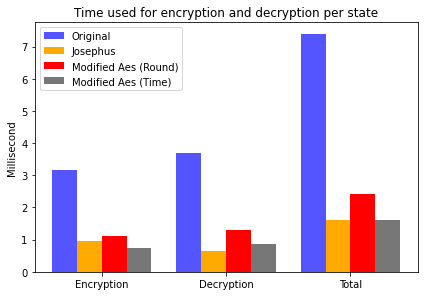

In [67]:
labels = ["Encryption", "Decryption", "Total"]
bar_width = 0.2

fig, ax = plt.subplots()
x = np.arange(len(labels))

ax.bar(x - 3*bar_width/2, 
       time_data_original.values(),
       bar_width, label='Original', color='#5555FF')
ax.bar(x - bar_width/2,
       time_data_josephus.values(),
       bar_width, label='Josephus', color='#FFAA00')
ax.bar(x + bar_width/2,
       time_data_modified_round.values(),
       bar_width, label='Modified Aes (Round)', color='#FF0000')
ax.bar(x + 3*bar_width/2,
       time_data_modified_time.values(),
       bar_width, label='Modified Aes (Time)', color='#777777')

ax.set_ylabel('Millisecond')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.title('Time used for encryption and decryption per state')
plt.show()

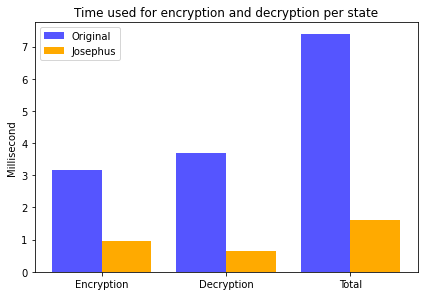

In [71]:
labels = ["Encryption", "Decryption", "Total"]
bar_width = 0.4

fig, ax = plt.subplots()
x = np.arange(len(labels))

ax.bar(x - bar_width/2, 
       time_data_original.values(),
       bar_width, label='Original', color='#5555FF')
ax.bar(x + bar_width/2,
       time_data_josephus.values(),
       bar_width, label='Josephus', color='#FFAA00')
ax.set_ylabel('Millisecond')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()

plt.title('Time used for encryption and decryption per state')
plt.show()

# Avalanche Analysis

## Data

In [53]:
avalanche_df = pd.read_csv("avalanche_data.csv")
avalanche_df["Original_AES_Avalanche"] = avalanche_df["Original_AES_Avalanche"].astype(float)*100
avalanche_df["Josephus_AES_Avalanche"] = avalanche_df["Josephus_AES_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Round_Avalanche"] = avalanche_df["Modified_AES_Round_Avalanche"].astype(float)*100
avalanche_df["Modified_AES_Time_Avalanche"] = avalanche_df["Modified_AES_Time_Avalanche"].astype(float)*100

In [54]:
avalanche_df[["Original_AES_Avalanche","Josephus_AES_Avalanche"]].describe().drop("count")

,Original_AES_Avalanche,Josephus_AES_Avalanche
mean,49.882812,49.820312
std,4.028814,4.551173
min,39.843750,39.843750
25%,46.875000,46.875000
50%,49.218750,49.218750
75%,52.343750,52.343750
max,59.375000,61.718750


In [55]:
avalanche_df.head(10)

,Plaintext_1,Plaintext_2,Original_AES_Ciphertext_1,Original_AES_Ciphertext_2,Original_AES_Avalanche,Josephus_AES_Ciphertext_1,Josephus_AES_Ciphertext_2,Josephus_AES_Avalanche,Modified_AES_Round_Ciphertext_1,Modified_AES_Round_Ciphertext_2,Modified_AES_Round_Avalanche,Modified_AES_Time_Ciphertext_1,Modified_AES_Time_Ciphertext_2,Modified_AES_Time_Avalanche
0,<bG55KZt!'#%0Rg~,<bG55KZt!'#%hRg~,34f131322ade8311ca729854f37c1a7e,696d7b1cfdece17c932405b5045bc5eb,56.25000,4921edf6ac6a928b0078f73a45a60a04,ba5a596ccfa4b76c448c7b7d9c796e95,54.68750,c7fe3d00c807ac9ad220a5b966092b42,2d4abf34061df86a757f194d20207f0a,47.65625,85448fcfb112283c403da1c104f46106,edaba6499ae2d2caf3b80ab283b4653f,50.00000
1,aUjU]?k*sB(mD:{y,aUjU]?F*sB(mD:{y,399ff1f2a397515016aed92145c92ea9,bf5a35874ccd855a2323567ba2c0dcbd,50.00000,e785536d56a8725442a29fcac529027b,5d4f3424746affd2ccec7877faaa005b,46.87500,b9884981ceaa1dd51bae30a9f530d6c9,48776c795da02c2b9390b543e8328d58,50.78125,18b91cc928179f8101ca32bcf135d29d,60f080f1bbe20efde7cbf8af3e300262,50.00000
2,"5AtF""mVi~Z1f_;})","5AtF""mVi~Z1f_;}>",0dae16628106c13326415ec19d0f16d4,50fc5fb95e6acf8bab6d3a4c219be0ae,53.12500,9bd963c06c89d1f72a1465cdad6b74ea,a4656b75b839e66f2b09c15b8fff42d0,44.53125,6338c4d6821cf0259ec86cd75210caf1,9757cc6eac7eca29c4abc5f51da3c80b,46.87500,2fa549c366d597efd587288e5294eef6,3c27b7d782a40a93c8cbe1c03e5ba713,50.78125
3,"QtNLLr5{!?""]hP#1",QtNLLr5{!?f]hP#1,3967139c6b4460525a7610ab67dbccaf,4ad565b302e85c5257f5d3c58c0c5284,52.34375,0ca14a519ee6a1a9f83587845940c1c2,e79710a8cd96258ec0d165a6222abd2f,52.34375,98678ac7e038c6b2ff8d064e1ae9a18b,f1ff1077803006e1fa6550dfd72f938f,38.28125,b8449e953190f7294dda8f41a1d679e8,25dc9ca4eef1f554c2c05f898c509eb6,47.65625
4,"_q"".8T$Z.$j1@HKF","_q"".8T$Z.$j1@HKN",035451a9ac76db6f16d9bb201d2a9a30,0d214f73f00e17d1064afeb19c8b53df,48.43750,56ba535361e9661880dc31c31fb41b2c,f7621e311d4ef63fc664aef704e63e83,48.43750,423f4c64c38654277fe0db0cd2daa5a1,fff6da112354539c22c4a545031f425b,55.46875,ad6656b8c6245ee52c79a4bf34f4bd60,0c412055981ae58366192207a95060d7,54.68750
5,H]n1epk=>K~;%f_l,H]n1epk=>K~;%#_l,1c9e5865440cea8f8c09523dfd974c55,56157068b8ae2bb401ae93d1e10dcc29,46.09375,490d2cefac32e1863e401da986c0b747,02f93ce2850c63b4e26766a79cfeb8ce,46.09375,7bab2f8fec6e5da5a14c90c91d3ba6e3,d1ec3d09a0f1759217a99acc90186348,46.09375,b624ab8b8dfe79df841c18d016b7b54f,a702c76c49b6be95a639b73180d046fa,49.21875
6,#XtE0Y4J[0Cafx?Z,#XtE0%4J[0Cafx?Z,1fb5a67211e55383f33152f2190e8a02,140a7c8212161d2ae221c72f9a550ad7,48.43750,c561e05248245db1787395bd8bd0fd76,2b13a04eb28c9e91203ea45bd5dc6f80,46.09375,8098807a95e704d33524c28db76c5d19,23ff1d3c5fb8f1825ab4aee55ca2583a,52.34375,2aaf930d0a9e44433b340b9de2ebd888,d7b769dd66e1528c538f2052e3f90160,53.90625
7,_Ze-7ylf&sXE^`tv,_Ze-7Hlf&sXE^`tv,30b18613fc9b4a3e67cc6e2e21411ac5,3613fe29dcd71c4c631ab85eb7d80b2d,41.40625,2c51fc0dceca1e4dee32dbe68aa017e6,b46ecb8cbab54ffa695192455628e262,51.56250,ae9f86055bdb5221e9ec8e57c05dc8a6,d235ac865313b34131a3d1eb361f2017,47.65625,e6ca238e5e3bf07744e837625e13afc1,de15474711205f478bfec94e20f29420,56.25000
8,D&h0HNI1cVJaTt2g,D&h0HNI1cVJajt2g,8dca4d04c1fcd439c1da7d22e2c57fd9,14329ec429bf122053c3d9825793f49f,44.53125,cbef1168f266daa3ca7492f0dd885106,41c0f9ddfcac50e77117b51b68c040c7,47.65625,ada1d5f3a82d78b8932410e448440e76,c4cd3e49e2f95577cb73d155d96554f1,50.00000,e0c5c14c9ee98f732a94a44c123a2a39,467ac5e24b132ab643cacdc7ee1208e1,52.34375
9,"TjhX>Ve55Q}""Y}iF","TjhX>Ve55Q}""g}iF",eb572f54ea630684ad8903713267cc10,a9d6b9ecf461b42c4b8df3714cb4e4c2,39.84375,2d76fd5e8929eb8887b684248131103d,7e673ae87f207ae7cf20848de5466e92,50.00000,774d0ac7df22d586110df24dd9d4f731,58bd6764269bd3d4cb25bc8ca5bdb989,50.78125,f6e505f290990f826495b401fe911080,9be36b2226d50be7d7dd0b33d03400c5,44.53125


In [56]:
avalanche_df_mean = avalanche_df.mean()

## Text

In [57]:
print(f"""
Original AES : {avalanche_df_mean['Original_AES_Avalanche']}%
Josephus AES : {avalanche_df_mean['Josephus_AES_Avalanche']}%
Modified AES (Round) : {avalanche_df_mean['Modified_AES_Round_Avalanche']}%
Modified AES (Time) : {avalanche_df_mean['Modified_AES_Time_Avalanche']}%
""")


Original AES : 49.8828125%
Josephus AES : 49.8203125%
Modified AES (Round) : 49.84375%
Modified AES (Time) : 50.6015625%



## Graph

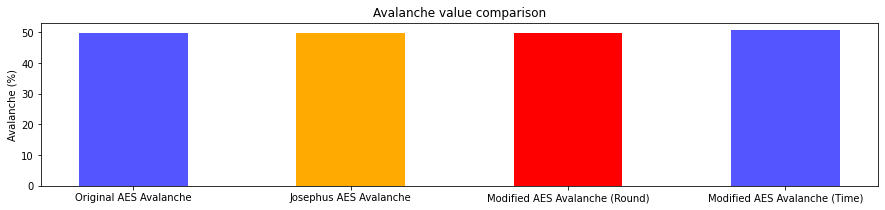

In [61]:
plt.figure(figsize=(15,3))
plt.bar(['Original AES Avalanche', 
         'Josephus AES Avalanche',
         'Modified AES Avalanche (Round)',
         'Modified AES Avalanche (Time)'],
        
        [avalanche_df_mean['Original_AES_Avalanche'],
        avalanche_df_mean['Josephus_AES_Avalanche'],
        avalanche_df_mean['Modified_AES_Round_Avalanche'],
        avalanche_df_mean['Modified_AES_Time_Avalanche']]
       ,color=['#5555FF','#FFAA00','#FF0000']
       ,width=0.5)
plt.ylabel('Avalanche (%)')
plt.title('Avalanche value comparison')
plt.show()

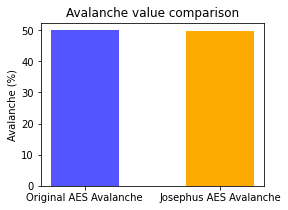

In [66]:
plt.figure(figsize=(4,3))
plt.bar(['Original AES Avalanche', 
         'Josephus AES Avalanche'],
        
        [avalanche_df_mean['Original_AES_Avalanche'],
        avalanche_df_mean['Josephus_AES_Avalanche']]
       ,color=['#5555FF','#FFAA00','#FF0000']
       ,width=0.5)
plt.ylabel('Avalanche (%)')
plt.title('Avalanche value comparison')
plt.show()